### USING LINEAR SVM with Sgd known as SGDClassifier

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

In [3]:
df_train=pd.read_csv("../data/mnist/mnist_train.csv",header=None)

In [4]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test=pd.read_csv("../data/mnist/mnist_test.csv",header=None)

In [6]:
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [8]:
28*28

784

In [9]:
x_train=df_train.iloc[:,1:].values/255

In [10]:
y_train = df_train.iloc[:, 0].values

In [11]:
x_test=df_test.iloc[:,1:].values/255

In [55]:
y_test=df_test.iloc[:,0].values

In [13]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [14]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [15]:
import seaborn as sns

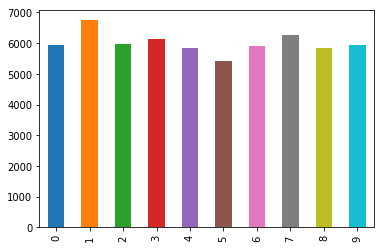

In [16]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [17]:
x_train.shape

(60000, 784)

In [18]:
x_train.flatten().shape

(47040000,)

(array([3.8102393e+07, 1.1345500e+05, 7.6548000e+04, 1.0439400e+05,
        6.6159000e+04, 9.5908000e+04, 5.6666000e+04, 9.1235000e+04,
        6.2246000e+04, 7.8855000e+04, 7.3719000e+04, 6.0073000e+04,
        7.0651000e+04, 4.1422000e+04, 7.2810000e+04, 3.8925000e+04,
        7.0599000e+04, 4.0152000e+04, 6.1646000e+04, 4.1883000e+04,
        5.8821000e+04, 5.9774000e+04, 4.6235000e+04, 5.4417000e+04,
        4.3714000e+04, 8.0318000e+04, 3.2216000e+04, 5.4474000e+04,
        3.6620000e+04, 4.7568000e+04, 4.9189000e+04, 3.2399000e+04,
        6.3714000e+04, 5.1333000e+04, 4.6069000e+04, 3.0571000e+04,
        5.2405000e+04, 3.4146000e+04, 4.8776000e+04, 2.9427000e+04,
        5.2970000e+04, 4.9590000e+04, 3.6207000e+04, 5.0077000e+04,
        4.4768000e+04, 4.9087000e+04, 3.2533000e+04, 5.0111000e+04,
        3.1556000e+04, 4.9745000e+04, 1.0926300e+05, 3.7954000e+04,
        4.7136000e+04, 3.3539000e+04, 5.4507000e+04, 4.5067000e+04,
        5.3116000e+04, 3.2616000e+04, 5.0545000e

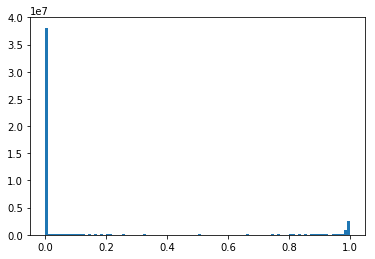

In [19]:
plt.hist(x_train.flatten(), bins = 100)

(array([3.8102393e+07, 1.1345500e+05, 7.6548000e+04, 1.0439400e+05,
        6.6159000e+04, 9.5908000e+04, 5.6666000e+04, 9.1235000e+04,
        6.2246000e+04, 7.8855000e+04, 7.3719000e+04, 6.0073000e+04,
        7.0651000e+04, 4.1422000e+04, 7.2810000e+04, 3.8925000e+04,
        7.0599000e+04, 4.0152000e+04, 6.1646000e+04, 4.1883000e+04,
        5.8821000e+04, 5.9774000e+04, 4.6235000e+04, 5.4417000e+04,
        4.3714000e+04, 8.0318000e+04, 3.2216000e+04, 5.4474000e+04,
        3.6620000e+04, 4.7568000e+04, 4.9189000e+04, 3.2399000e+04,
        6.3714000e+04, 5.1333000e+04, 4.6069000e+04, 3.0571000e+04,
        5.2405000e+04, 3.4146000e+04, 4.8776000e+04, 2.9427000e+04,
        5.2970000e+04, 4.9590000e+04, 3.6207000e+04, 5.0077000e+04,
        4.4768000e+04, 4.9087000e+04, 3.2533000e+04, 5.0111000e+04,
        3.1556000e+04, 4.9745000e+04, 1.0926300e+05, 3.7954000e+04,
        4.7136000e+04, 3.3539000e+04, 5.4507000e+04, 4.5067000e+04,
        5.3116000e+04, 3.2616000e+04, 5.0545000e

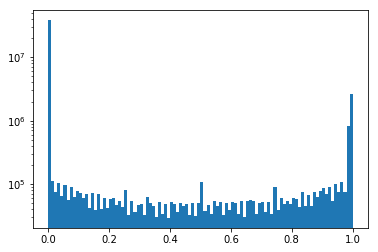

In [20]:
plt.hist(x_train.flatten(), bins = 100,log =True)

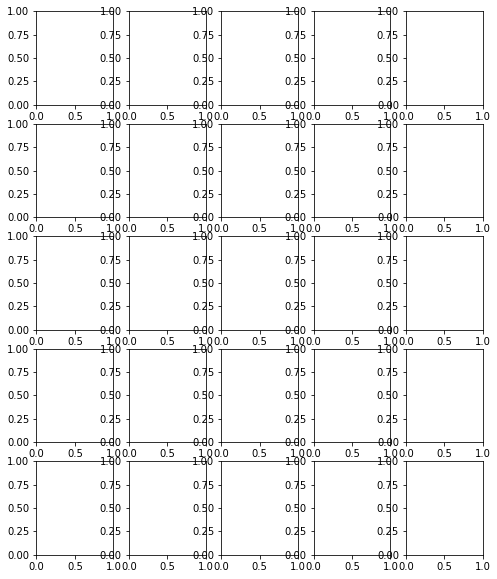

In [21]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

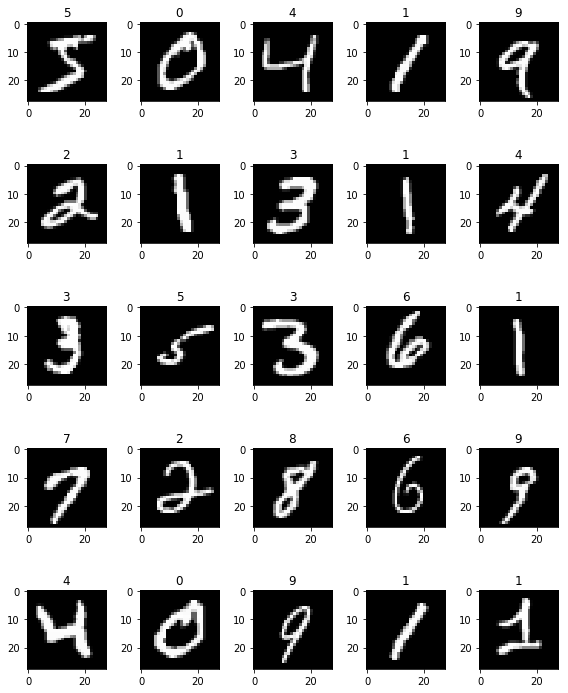

In [22]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(x_train[i].reshape((28,28)), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

In [23]:
est = linear_model.SGDClassifier(n_jobs=12, tol=1e-5, eta0 = 0.15, loss = "log",
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 1000)

In [24]:
est.fit(x_train,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.15, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='log',
       max_iter=1000, n_iter=None, n_iter_no_change=5, n_jobs=12,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=1e-05, validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
est.score(x_test,y_test)

0.8987

In [26]:
y_test_pred = est.predict(x_test)

In [27]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

In [28]:
summary

,actual,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [29]:
summary=summary[summary["actual"]!=summary["prediction"]]

In [30]:
summary.groupby(["actual","prediction"]).actual.count()

actual  prediction
0       2              2
        3              1
        4              1
        5              3
        6              9
        7              1
        8              2
1       2              2
        3              3
        4              1
        5              2
        6              4
        7              1
        8             23
2       0             12
        1             18
        3             21
        4             15
        5              1
        6             17
        7             21
        8             37
        9              9
3       0              6
        1              3
        2             19
        4              1
        5             28
        6              8
        7             18
                      ..
6       3              2
        4             11
        5             16
        7              1
        8              3
7       0              4
        1             24
        2             22
      

In [31]:
summary.groupby(["actual","prediction"]).actual.count().unstack()

prediction,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,NaN,NaN,2.0,1.0,1.0,3.0,9.0,1.0,2.0,NaN
1,NaN,NaN,2.0,3.0,1.0,2.0,4.0,1.0,23.0,NaN
2,12.0,18.0,NaN,21.0,15.0,1.0,17.0,21.0,37.0,9.0
3,6.0,3.0,19.0,NaN,1.0,28.0,8.0,18.0,20.0,11.0
4,1.0,7.0,4.0,1.0,NaN,1.0,12.0,1.0,7.0,52.0
5,14.0,9.0,4.0,53.0,17.0,NaN,22.0,11.0,28.0,11.0
6,11.0,3.0,5.0,2.0,11.0,16.0,NaN,1.0,3.0,NaN
7,4.0,24.0,22.0,3.0,11.0,NaN,2.0,NaN,3.0,33.0
8,12.0,14.0,12.0,21.0,13.0,32.0,14.0,13.0,NaN,15.0


In [32]:
y_test_prob = est.predict_proba(x_test)

In [33]:
y_test_prob.shape

(10000, 10)

In [34]:
y_test_prob

array([[1.49858419e-02, 7.98365601e-04, 1.87480614e-02, ...,
        8.84013024e-01, 2.41520107e-03, 2.07997609e-02],
       [6.31602555e-02, 2.21038654e-03, 5.43717166e-01, ...,
        3.13716907e-05, 1.35463345e-02, 1.69488996e-04],
       [2.30182034e-03, 8.00693236e-01, 3.83174401e-02, ...,
        4.59412990e-02, 1.01143655e-02, 1.21250746e-02],
       ...,
       [1.40420807e-04, 5.96952588e-04, 1.21878419e-03, ...,
        2.31354692e-02, 1.39589072e-01, 1.24325373e-01],
       [1.66181753e-02, 2.41676734e-02, 6.60010967e-03, ...,
        7.38694405e-03, 4.97241538e-01, 2.75265185e-03],
       [5.15761665e-02, 2.66904176e-05, 4.52904550e-02, ...,
        4.10732682e-05, 1.08790818e-03, 1.03139479e-03]])

### using Keras 

In [37]:
import keras

In [38]:
y_train=keras.utils.to_categorical(y_train)

In [39]:
y_train.shape

(60000, 10)

In [40]:
y_test=keras.utils.to_categorical(y_test)

In [41]:
y_test.shape

(10000, 10)

In [43]:
model=keras.Sequential()

In [48]:
model=keras.Sequential()
model.add(keras.layers.Dense(400, activation="relu", input_shape = (784,)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

model.compile(optimizer="adam",metrics=['accuracy'],loss=keras.losses.categorical_crossentropy)
model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.2206 - acc: 0.9354
Epoch 2/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0847 - acc: 0.9731
Epoch 3/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0556 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0419 - acc:

In [53]:
y_test_pred=model.predict_classes(x_test)
type(y_test)

numpy.ndarray

In [56]:

metrics.accuracy_score(y_test_pred,y_test)

0.9801

In [58]:
y_test_prob = model.predict(x_test)

In [59]:
model.save("./mnist.h5")

In [60]:
saved_model = keras.Sequential()
saved_model = keras.models.load_model("./mnist.h5")
y_test_pred = saved_model.predict_classes(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9801